In [6]:
# Célula 1: Importação de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

print("Bibliotecas essenciais importadas com sucesso!")

Bibliotecas essenciais importadas com sucesso!


In [7]:
# Carregamento do DataFrame e Visão Geral

processed_tables_dir = os.path.join('..', 'data', 'output', 'processed_tables')
file_path = os.path.join(processed_tables_dir, 'vendedores_top_vendas.csv')
df_vendedores_top = pd.read_csv(file_path)
print(f"DataFrame '{os.path.basename(file_path)}' carregado com sucesso!")

DataFrame 'vendedores_top_vendas.csv' carregado com sucesso!


In [11]:
# --- NOVA ETAPA: Criar uma coluna combinada para Nome e Região ---
# Esta nova coluna será usada como rótulo no eixo Y do gráfico.
df_vendedores_top['vendedor_e_regiao'] = df_vendedores_top['nome_vendedor'] + ' (' + df_vendedores_top['regiao'] + ')'

# Reordenar o DataFrame para garantir que os top vendedores (agora com a nova coluna) apareçam primeiro
df_vendedores_top = df_vendedores_top.sort_values(by='total_vendas_brl', ascending=False)

print(f"DataFrame '{os.path.basename(file_path)}' carregado e processado com sucesso!")

DataFrame 'vendedores_top_vendas.csv' carregado e processado com sucesso!


In [12]:
print("\n--- Primeiras 5 linhas (df.head()) ---")
print(df_vendedores_top.head())

print("\n--- Informações do DataFrame (df.info()) ---")
df_vendedores_top.info()

print("\n--- Estatísticas Descritivas (df.describe()) ---")
print(df_vendedores_top.describe())


--- Primeiras 5 linhas (df.head()) ---
   vendedor_id   nome_vendedor        regiao  total_vendas_brl  \
0          107  Heloísa Britto         Norte       73253828.88   
1          108   Igor Carvalho         Norte       73029606.80   
2          101      Bruna Lima  Centro-Oeste       72763533.31   
3          109  Janaína Dantas  Centro-Oeste       72621779.37   
4          110  Kleber Esteves  Centro-Oeste       72528766.65   

               vendedor_e_regiao  
0         Heloísa Britto (Norte)  
1          Igor Carvalho (Norte)  
2      Bruna Lima (Centro-Oeste)  
3  Janaína Dantas (Centro-Oeste)  
4  Kleber Esteves (Centro-Oeste)  

--- Informações do DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendedor_id        50 non-null     int64  
 1   nome_vendedor      50 non-null     object 
 2   regiao  

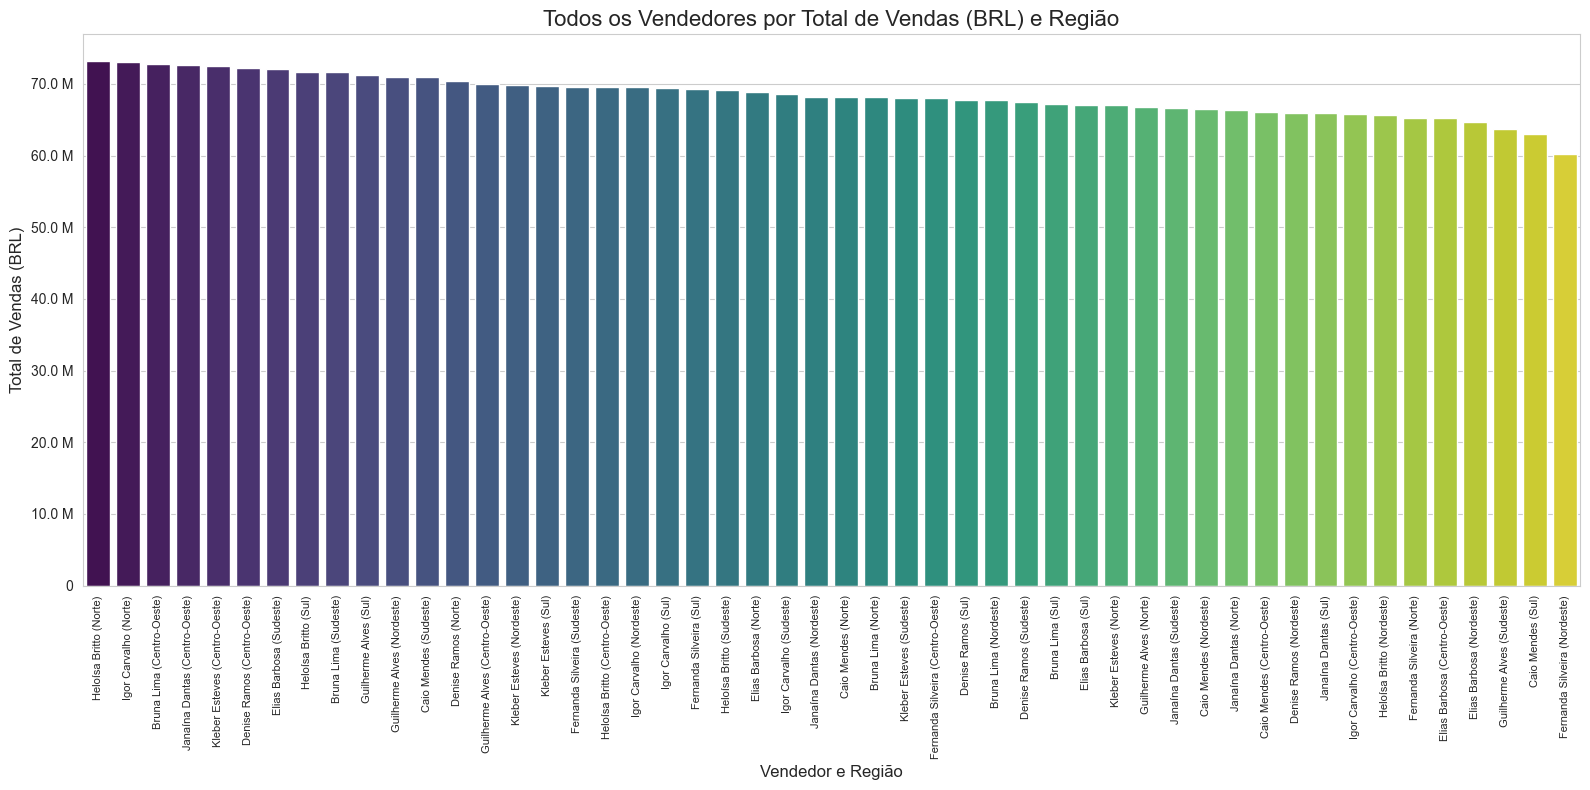

In [20]:
# Célula 3: Visualização - Todos os Vendedores por Total de Vendas (Gráfico de Barras VERTICAL)

sns.set_style("whitegrid")

# Ajuste o tamanho da figura para acomodar 50 barras verticais.
# A largura pode precisar ser maior para nomes no eixo X e a altura para as barras.
plt.figure(figsize=(16, 8)) # Largura maior, altura adequada para as barras

# Criar o gráfico de barras VERTICAL
# 'x' será a categoria (nome do vendedor + região) e 'y' será o valor (total de vendas)
sns.barplot(
    x='vendedor_e_regiao', # AGORA NO EIXO X
    y='total_vendas_brl',  # AGORA NO EIXO Y
    data=df_vendedores_top, # Usando o DataFrame completo (todos os 50 vendedores)
    palette='viridis',
    hue='vendedor_e_regiao',
    legend=False
)

plt.title('Todos os Vendedores por Total de Vendas (BRL) e Região', fontsize=16)
plt.xlabel('Vendedor e Região', fontsize=12) # Rótulo do eixo X
plt.ylabel('Total de Vendas (BRL)', fontsize=12) # Rótulo do eixo Y

# Ajustar o tamanho da fonte e rotação dos rótulos do eixo X (nomes dos vendedores)
plt.xticks(fontsize=8, rotation=90) # Reduz a fonte e gira os rótulos para evitar sobreposição

# Formatar os ticks do eixo Y (Total de Vendas) para melhorar a legibilidade
import matplotlib.ticker as mticker
def format_sales_value(value, pos):
    if value >= 1_000_000_000:
        return f'{value*1e-9:.1f} B'
    elif value >= 1_000_000:
        return f'{value*1e-6:.1f} M'
    elif value >= 1_000:
        return f'{value*1e-3:.1f} K'
    return f'{value:.0f}'

formatter = mticker.FuncFormatter(format_sales_value)
plt.gca().yaxis.set_major_formatter(formatter) # AGORA APLICADO AO EIXO Y

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


--- Contagem de Vendedores por Região ---
         Regiao  Numero_de_Vendedores
0         Norte                    10
1  Centro-Oeste                    10
2       Sudeste                    10
3           Sul                    10
4      Nordeste                    10


C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_19552\3675174415.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


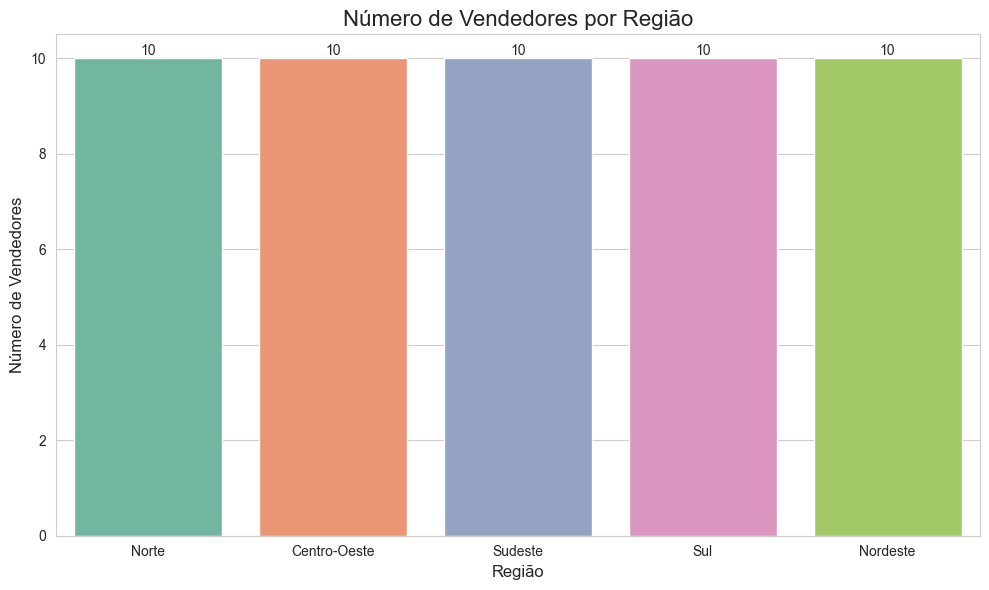

In [21]:
# Célula 5: Visualização - Contagem de Vendedores por Região (com Rótulos de Dados)

# 1. Contar quantos vendedores existem em cada região
# df_vendedores_top já contém todos os 50 vendedores
contagem_vendedores_por_regiao = df_vendedores_top['regiao'].value_counts().reset_index()
contagem_vendedores_por_regiao.columns = ['Regiao', 'Numero_de_Vendedores']

# Opcional: Ordenar por número de vendedores para melhor visualização
contagem_vendedores_por_regiao = contagem_vendedores_por_regiao.sort_values(
    by='Numero_de_Vendedores', ascending=False
)

print("\n--- Contagem de Vendedores por Região ---")
print(contagem_vendedores_por_regiao)

# 2. Criar o gráfico de barras para a contagem
plt.figure(figsize=(10, 6)) # Tamanho adequado para este tipo de gráfico

sns.barplot(
    x='Regiao',
    y='Numero_de_Vendedores',
    data=contagem_vendedores_por_regiao,
    palette='Set2' # Uma paleta de cores diferente para este gráfico
)

# Adicionar rótulos e título
plt.title('Número de Vendedores por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de Vendedores', fontsize=12)

# Adicionar os valores numéricos em cima de cada barra
# Iterar sobre as barras criadas pelo seaborn e adicionar o texto
ax = plt.gca() # Pega os eixos atuais do gráfico
for container in ax.containers: # 'containers' são os grupos de barras (nesse caso, um único grupo)
    ax.bar_label(container, fmt='%d', label_type='edge') # Adiciona rótulos numéricos (formato de inteiro)

plt.tight_layout() # Ajusta o layout
plt.show()


--- Total de Vendas por Região (Agregado entre os Vendedores) ---
         regiao  total_vendas_regionais
0  Centro-Oeste            6.949129e+08
3       Sudeste            6.881054e+08
2         Norte            6.874352e+08
4           Sul            6.824541e+08
1      Nordeste            6.694622e+08


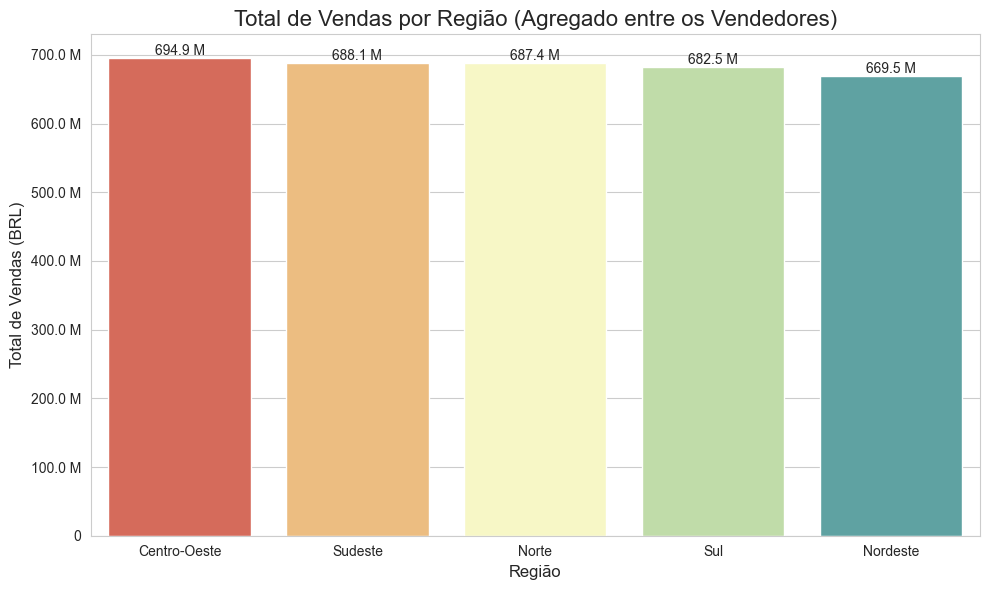


--- Contagem de Vendedores por Região ---
         Região  Número de Vendedores
0         Norte                    10
1  Centro-Oeste                    10
2       Sudeste                    10
3           Sul                    10
4      Nordeste                    10


In [25]:
# Célula 4: Análise e Visualização - Total de Vendas por Região (Agregado entre os Vendedores) - CORRIGIDO (TypeError)

# Agrupar o DataFrame dos vendedores pela região e somar as vendas
vendas_por_regiao_total = df_vendedores_top.groupby('regiao').agg(
    total_vendas_regionais=('total_vendas_brl', "sum")
).reset_index()

# Opcional: Ordenar para que as regiões com maiores vendas apareçam primeiro
vendas_por_regiao_total = vendas_por_regiao_total.sort_values(
    by='total_vendas_regionais', ascending=False
)

print("\n--- Total de Vendas por Região (Agregado entre os Vendedores) ---")
print(vendas_por_regiao_total)


# --- Criar o gráfico de barras ---
plt.figure(figsize=(10, 6)) # Ajuste o tamanho da figura

sns.barplot(
    x='regiao',
    y='total_vendas_regionais',
    data=vendas_por_regiao_total,
    palette='Spectral', # Uma paleta de cores diferente para variedade
    hue='regiao',       # A mesma coluna do X para o HUE
    legend=False        # Para não mostrar uma legenda redundante
)

# Adicionar título e rótulos
plt.title('Total de Vendas por Região (Agregado entre os Vendedores)', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Total de Vendas (BRL)', fontsize=12)

# --- FUNÇÃO DE FORMATAÇÃO PARA OS TICKS DO EIXO Y (JÁ EXISTENTE E CORRETA) ---
import matplotlib.ticker as mticker
def format_sales_value(value, pos):
    if value >= 1_000_000_000:
        return f'{value*1e-9:.1f} B' # Bilhões
    elif value >= 1_000_000:
        return f'{value*1e-6:.1f} M' # Milhões
    elif value >= 1_000:
        return f'{value*1e-3:.1f} K' # Milhares
    return f'{value:.0f}'

formatter = mticker.FuncFormatter(format_sales_value)
plt.gca().yaxis.set_major_formatter(formatter)

# --- NOVA FUNÇÃO DE FORMATAÇÃO PARA OS RÓTULOS DAS BARRAS ---
# Esta função recebe apenas o valor, como esperado por ax.bar_label
def format_label_value(value):
    if value >= 1_000_000_000:
        return f'{value*1e-9:.1f} B'
    elif value >= 1_000_000:
        return f'{value*1e-6:.1f} M'
    elif value >= 1_000:
        return f'{value*1e-3:.1f} K'
    return f'{value:.0f}'

# Adicionar os valores numéricos em cima de cada barra
ax = plt.gca()
for container in ax.containers:
    # Usamos a nova função 'format_label_value' aqui
    ax.bar_label(container, fmt=format_label_value, label_type='edge')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# --- Insight Adicional: Contagem de Vendedores por Região ---
print("\n--- Contagem de Vendedores por Região ---")
contagem_vendedores_por_regiao = df_vendedores_top['regiao'].value_counts().reset_index()
contagem_vendedores_por_regiao.columns = ['Região', 'Número de Vendedores']
print(contagem_vendedores_por_regiao)


--- DataFrame com Percentual de Vendas por Região (para Plots de Barras) ---
    vendedor_id    nome_vendedor        regiao  total_vendas_brl  \
2           101       Bruna Lima  Centro-Oeste       72763533.31   
3           109   Janaína Dantas  Centro-Oeste       72621779.37   
4           110   Kleber Esteves  Centro-Oeste       72528766.65   
5           103     Denise Ramos  Centro-Oeste       72264303.48   
13          106  Guilherme Alves  Centro-Oeste       70035186.76   

                 vendedor_e_regiao  total_vendas_regiao  \
2        Bruna Lima (Centro-Oeste)         6.949129e+08   
3    Janaína Dantas (Centro-Oeste)         6.949129e+08   
4    Kleber Esteves (Centro-Oeste)         6.949129e+08   
5      Denise Ramos (Centro-Oeste)         6.949129e+08   
13  Guilherme Alves (Centro-Oeste)         6.949129e+08   

    percentual_vendas_regiao  
2                  10.470886  
3                  10.450487  
4                  10.437103  
5                  10.399045  
13 

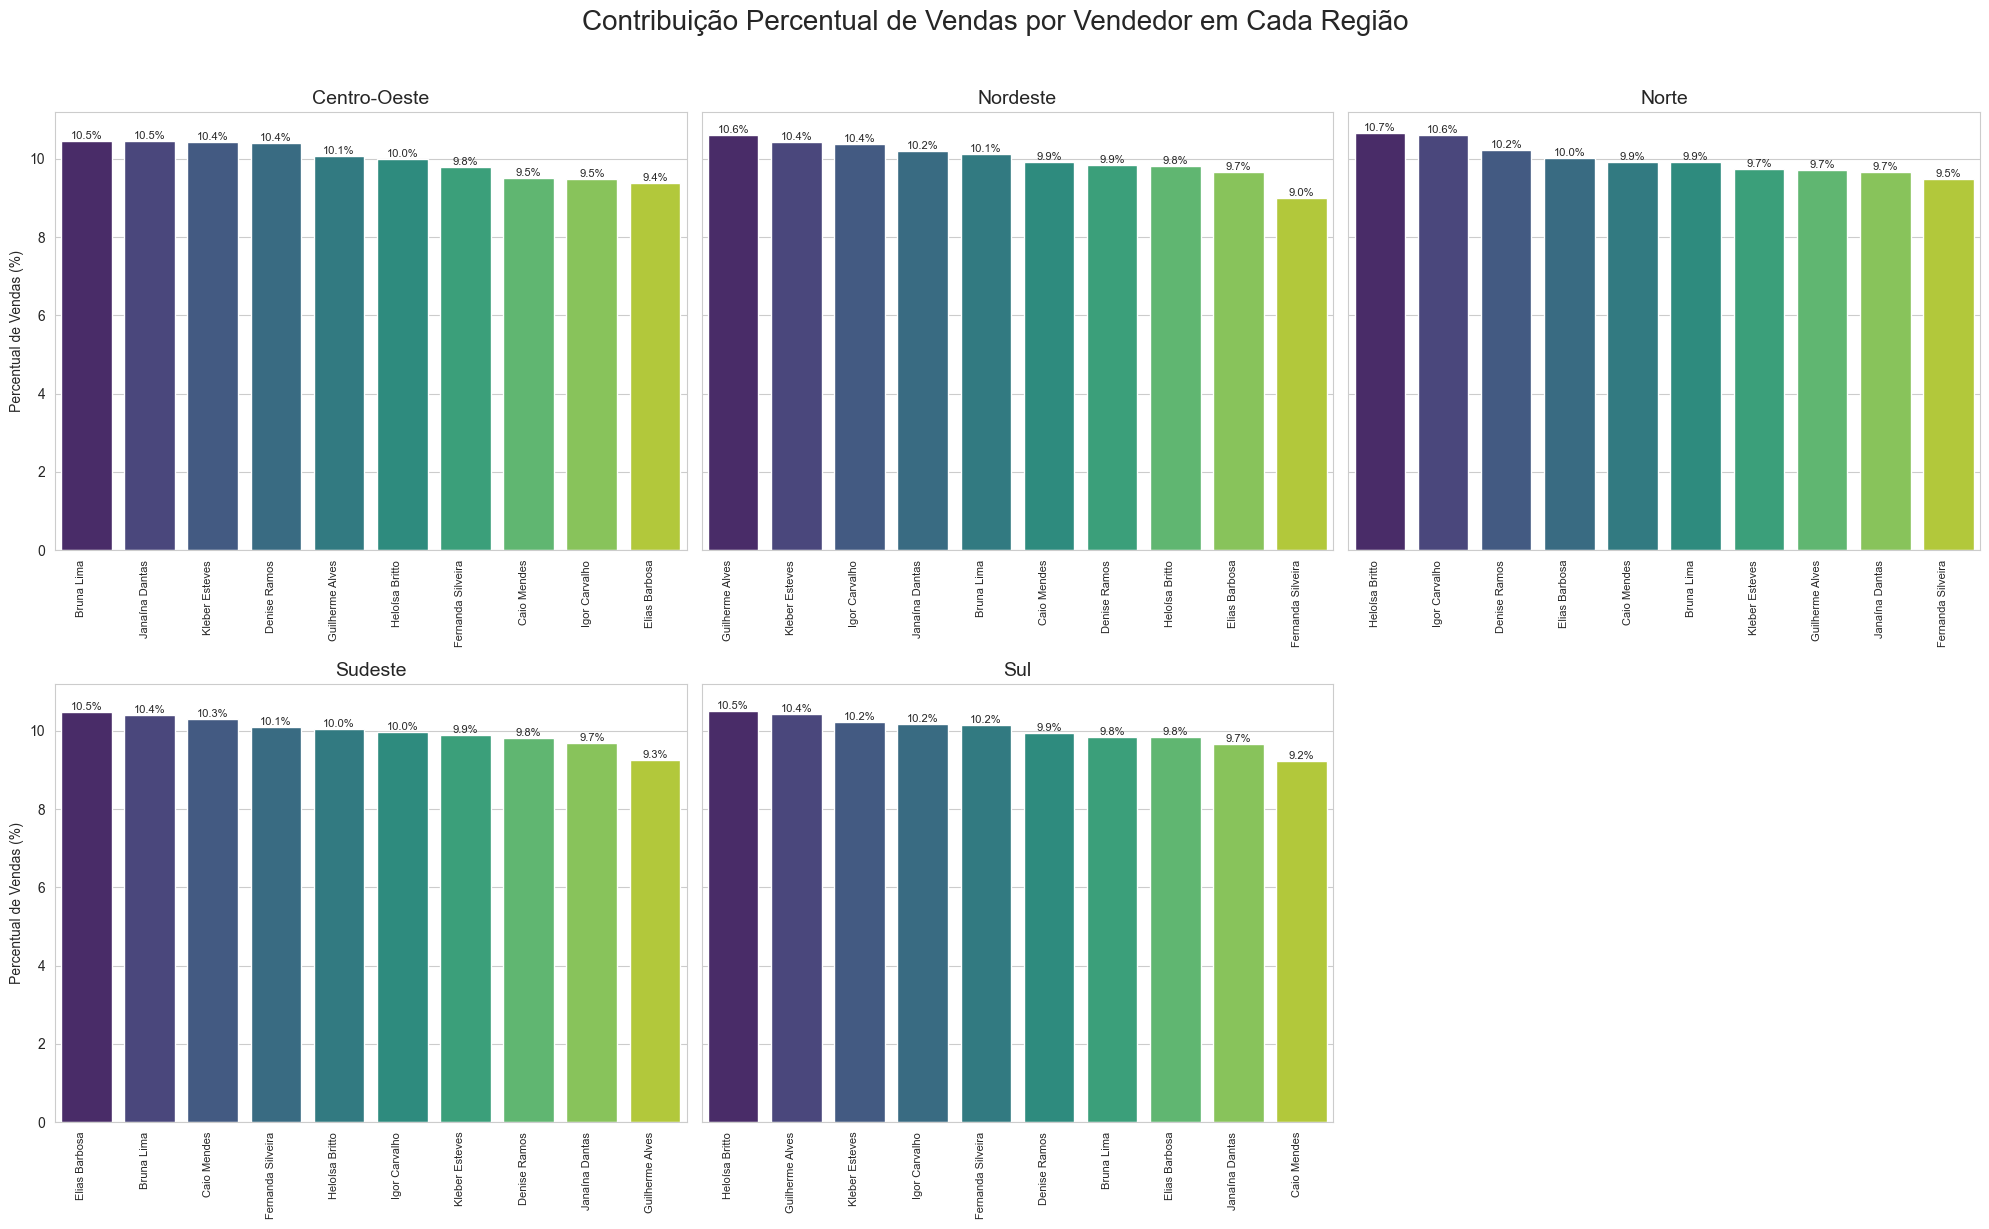

In [29]:
# Célula 7: Visualização - Contribuição Percentual de Vendas por Vendedor por Região (Gráficos de Barras VERTICAIS - Corrigido UserWarning)

# --- 1. Calcular a Porcentagem de Vendas por Vendedor em Cada Região ---
# (Este cálculo é o mesmo das células anteriores, que já está correto)

# Calcular o total de vendas por região
total_vendas_por_regiao = df_vendedores_top.groupby('regiao')['total_vendas_brl'].sum().reset_index()
total_vendas_por_regiao.rename(columns={'total_vendas_brl': 'total_vendas_regiao'}, inplace=True)

# Mesclar o total de vendas regionais de volta ao DataFrame dos vendedores
df_vendedores_com_percentual = pd.merge(
    df_vendedores_top,
    total_vendas_por_regiao,
    on='regiao',
    how='left'
)

# Calcular a porcentagem de vendas de cada vendedor dentro de sua região
df_vendedores_com_percentual['percentual_vendas_regiao'] = (
    df_vendedores_com_percentual['total_vendas_brl'] / df_vendedores_com_percentual['total_vendas_regiao']
) * 100

# Ordenar por região e depois por percentual (fundamental para a ordem das barras em cada plot)
df_vendedores_com_percentual = df_vendedores_com_percentual.sort_values(
    by=['regiao', 'percentual_vendas_regiao'], ascending=[True, False]
)

print("\n--- DataFrame com Percentual de Vendas por Região (para Plots de Barras) ---")
print(df_vendedores_com_percentual.head())


# --- 2. Criar Múltiplos Gráficos de Barras (um para cada Região) ---

# Obter a lista de regiões únicas
regioes_unicas = df_vendedores_com_percentual['regiao'].unique()

# Definir o número de plots e o layout da figura
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharey=True)
axes = axes.flatten() # Achatar o array de eixos para facilitar a iteração

plt.suptitle('Contribuição Percentual de Vendas por Vendedor em Cada Região', fontsize=20, y=1.02) # Título geral

for i, regiao in enumerate(regioes_unicas):
    ax = axes[i] # Seleciona o eixo para o plot atual
    df_regiao = df_vendedores_com_percentual[df_vendedores_com_percentual['regiao'] == regiao]

    sns.barplot(
        x='nome_vendedor', # Vendedor no eixo X
        y='percentual_vendas_regiao', # Percentual no eixo Y
        data=df_regiao,
        palette='viridis', # Paleta de cores
        ax=ax, # Passa o eixo específico para o plot
        hue='nome_vendedor', # Para colorir cada vendedor individualmente (e suprimir o warning)
        legend=False
    )

    ax.set_title(f'{regiao}', fontsize=14)
    ax.set_xlabel('') # Remove o rótulo do eixo X (já sabemos que são vendedores)
    ax.set_ylabel('Percentual de Vendas (%)', fontsize=10)

    # --- CORREÇÃO PARA O USERWARNING: Definir os ticks antes de definir os rótulos ---
    ax.set_xticks(np.arange(len(df_regiao['nome_vendedor']))) # Define as posições dos ticks
    ax.set_xticklabels(df_regiao['nome_vendedor'], rotation=90, ha='right', fontsize=8) # Gira os nomes

    # Adicionar os rótulos de percentual em cima das barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

# Remover plots vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()